# Exploratory Data Analysis:

> Haberman Cancer Survival dataset from Kaggle. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)  



#### No of attributes:4
#### Attribute Information:

- Age of patient at time of operation (numerical).

- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute)  
   **1** = The patient survived 5 years or longer  
   **2** = The patient died within 5 year

In [1]:
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np


#Reading data from file
warnings.filterwarnings('ignore')
hb=pd.read_csv('haberman.csv')

hb.head()


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 High level statistics of the dataset: number of points, number of features, number of classes, data-points per class

<h6>Q) How many data-points and features?</h6>

In [2]:
print(hb.shape)

(306, 4)


<h6>Q) Column names of dataset</h6>

In [3]:
print(hb.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


<h6>Q) Data points per class (Class=status)</h6>

In [4]:
hb['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

<h6>Q) Some high level stats about the dataset (data type and value count for each column)</h6>

In [5]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [6]:
hb[['age','year','nodes']].describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


<h6>Q) Duplicate rows in the data set</h6>

In [7]:
len(hb[hb.duplicated()])

17

<h6>Q)Missing values in the dataset </h6>

In [8]:
hb.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

#### Observations:
- This dataset is an imbalanced dataset with 74% values belonging to status=1 and 26% values belonging to status=2
- There are no missing values in any of the columns and 17 rows are duplicates 


### 1.2 - Objective of the problem.



- The objective of the problem is to do Exploratory Data Analysis of the given dataset for a classification problem
- To predict whether the patients undergone operation for cancer treatment will survive 5 years or greater or will die within 5 years
- To find relationships between the features and the importance of features


### 1.3 Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots

<h6>Q)Which features are important? </h6>

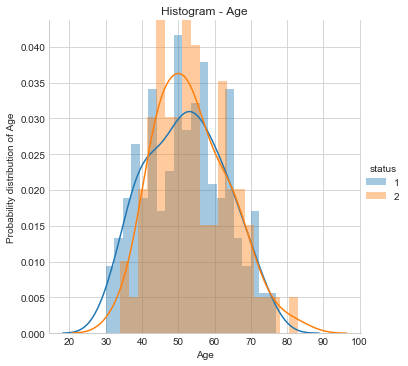

In [5]:
sns.set_style("whitegrid")
sns.FacetGrid(hb,hue="status",size=5)\
    .map(sns.distplot,"age",bins=20)\
    .add_legend()
plt.ylabel("Probability distribution of Age")
plt.xlabel("Age")
plt.title("Histogram - Age")
plt.show()

#### Observations:
- Patients between the age of 40 to 60 show a greater probability (3% - 3.6%) of dying than the probability(2.5%-3.1%) of surviving.
- All the patients below 35 have survived and above 76 have died.

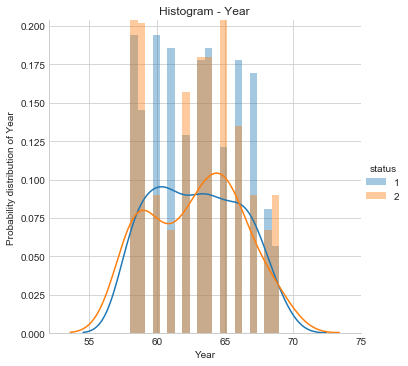

In [6]:
sns.FacetGrid(hb,hue="status",size=5)\
    .map(sns.distplot,"year",bins=20)\
    .add_legend()
plt.title("Histogram - Year")
plt.ylabel("Probability distribution of Year")
plt.xlabel("Year")
plt.xlim([52,75])
plt.show()

#### Observations:
- The probability of patients who survived was more between the years 58 to 63 (7.5% - 10%) and the probability of patients who died was more between the years 63 to 68 (9% - 10.5%)
- All the patients who were before the year 58 have died
.


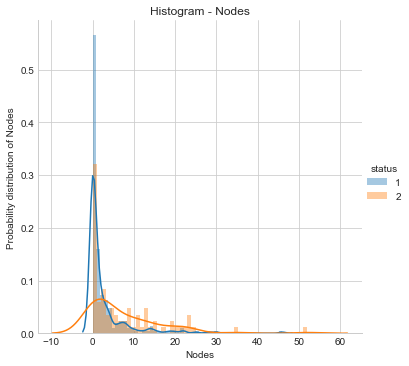

In [7]:
sns.FacetGrid(hb,hue="status",size=5)\
    .map(sns.distplot,"nodes",bins=50)\
    .add_legend()
plt.ylabel("Probability distribution of Nodes")
plt.xlabel("Nodes")
plt.title("Histogram - Nodes")
plt.show()



#### Observations:

- The patients who have survived  have a range of positive axiliary nodes between 0 and 3 & the patients died most probably have positive nodes greater than 3
- Hence, we can conclude more the no of positive nodes,more the probability of dying.




PDF [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797] 

Edges [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ] 

CDF [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ] 



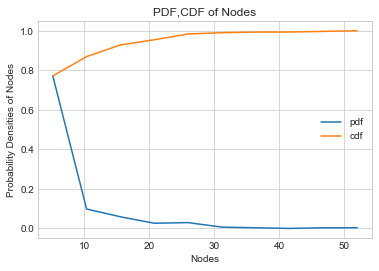

In [9]:
counts,edges=np.histogram(hb['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
print("PDF",pdf,"\n")
print("Edges",edges,"\n")
cdf=np.cumsum(pdf)
print("CDF",cdf,"\n")
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(["pdf","cdf"])
plt.title("PDF,CDF of Nodes")
plt.ylabel("Probability Densities of Nodes")
plt.xlabel("Nodes")
plt.show()

#### Observations:

- The distribution of positive nodes is greater in the range of [0,10].Above 10 we see less frequency of nodes.
- Approximately 85% of patients positive have nodes below 10.


Status=1
PDF [0.79111111 0.07111111 0.05333333 0.01777778 0.02222222 0.00888889
 0.00888889 0.00888889 0.00444444 0.00888889 0.         0.
 0.         0.         0.00444444] 

Edges [ 0.          3.06666667  6.13333333  9.2        12.26666667 15.33333333
 18.4        21.46666667 24.53333333 27.6        30.66666667 33.73333333
 36.8        39.86666667 42.93333333 46.        ] 

CDF [0.79111111 0.86222222 0.91555556 0.93333333 0.95555556 0.96444444
 0.97333333 0.98222222 0.98666667 0.99555556 0.99555556 0.99555556
 0.99555556 0.99555556 1.        ] 

Status=2
PDF [0.48148148 0.12345679 0.11111111 0.09876543 0.04938272 0.03703704
 0.07407407 0.         0.         0.         0.01234568 0.
 0.         0.         0.01234568] 

Edges [ 0.          3.46666667  6.93333333 10.4        13.86666667 17.33333333
 20.8        24.26666667 27.73333333 31.2        34.66666667 38.13333333
 41.6        45.06666667 48.53333333 52.        ] 

CDF [0.48148148 0.60493827 0.71604938 0.81481481 0.86419753 0.901

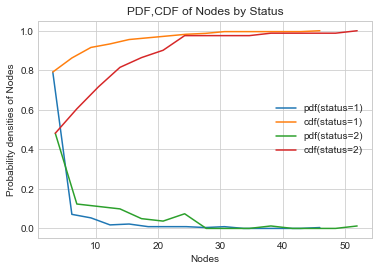

In [11]:
counts,edges=np.histogram(hb[hb['status']==1]['nodes'],bins=15,density=True)
pdf=counts/sum(counts)
print("Status=1")
print("PDF",pdf,"\n")
print("Edges",edges,"\n")
cdf=np.cumsum(pdf)
print("CDF",cdf,"\n")
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)

print("Status=2")
counts,edges=np.histogram(hb[hb['status']==2]['nodes'],bins=15,density=True)
pdf=counts/sum(counts)
print("PDF",pdf,"\n")
print("Edges",edges,"\n")
cdf=np.cumsum(pdf)
print("CDF",cdf,"\n")
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
#plt.xlim([10,20])

plt.ylabel("Probability densities of Nodes")
plt.xlabel("Nodes")
plt.legend(["pdf(status=1)","cdf(status=1)","pdf(status=2)","cdf(status=2)"])
plt.title("PDF,CDF of Nodes by Status")
plt.show()

#### Observations:

- 80% of patients who have survived have positive nodes between the range [0,3]
- The survival rate of patients having positive nodes below 12 is 93%
- 48% of patients who died have positive nodes between the range [0,3]
- 90% of patients who died have positive nodes below 20
- The probabilites of patients surviving is more in the range [0,3] of positive nodes.
- The probabilities of patients dying is more in the range [3,24] of positive nodes.

Status=1
PDF [0.03111111 0.04       0.08888889 0.07555556 0.07555556 0.06666667
 0.09777778 0.14222222 0.08888889 0.07555556 0.07111111 0.05777778
 0.04444444 0.02666667 0.01777778] 

Edges [30.         33.13333333 36.26666667 39.4        42.53333333 45.66666667
 48.8        51.93333333 55.06666667 58.2        61.33333333 64.46666667
 67.6        70.73333333 73.86666667 77.        ] 

CDF [0.03111111 0.07111111 0.16       0.23555556 0.31111111 0.37777778
 0.47555556 0.61777778 0.70666667 0.78222222 0.85333333 0.91111111
 0.95555556 0.98222222 1.        ] 

Status=2
PDF [0.02469136 0.02469136 0.11111111 0.16049383 0.08641975 0.14814815
 0.09876543 0.07407407 0.08641975 0.07407407 0.03703704 0.03703704
 0.01234568 0.01234568 0.01234568] 

Edges [34.         37.26666667 40.53333333 43.8        47.06666667 50.33333333
 53.6        56.86666667 60.13333333 63.4        66.66666667 69.93333333
 73.2        76.46666667 79.73333333 83.        ] 

CDF [0.02469136 0.04938272 0.16049383 0.32098765 

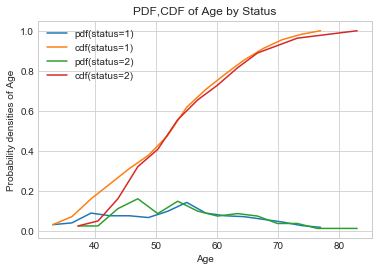

In [12]:
counts,edges=np.histogram(hb[hb['status']==1]['age'],bins=15,density=True)
pdf=counts/sum(counts)
print("Status=1")
print("PDF",pdf,"\n")
print("Edges",edges,"\n")
cdf=np.cumsum(pdf)
print("CDF",cdf,"\n")
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)

print("Status=2")
counts,edges=np.histogram(hb[hb['status']==2]['age'],bins=15,density=True)
pdf=counts/sum(counts)
print("PDF",pdf,"\n")
print("Edges",edges,"\n")
cdf=np.cumsum(pdf)
print("CDF",cdf,"\n")
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
#plt.xlim([10,20])

plt.legend(["pdf(status=1)","cdf(status=1)","pdf(status=2)","cdf(status=2)"])
plt.title("PDF,CDF of Age by Status")
plt.ylabel("Probability densities of Age")
plt.xlabel("Age")
plt.show()

#### Observations:

- All the patients with ages between 30 & 36 have survived.
- The ages between 40 - 50 have a higher probability of dying (2%-16%) than the probability of surviving (4%-7.5%)
- As the age is increasing, the probability of dying is increasing.
- Above 76 age all the patients died.

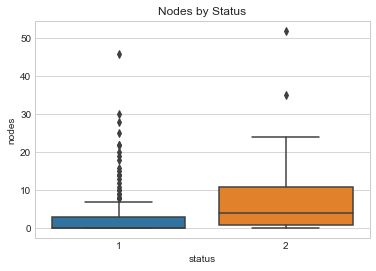

In [15]:
sns.boxplot(x='status',y='nodes',data=hb)
plt.title("Nodes by Status")
plt.show()

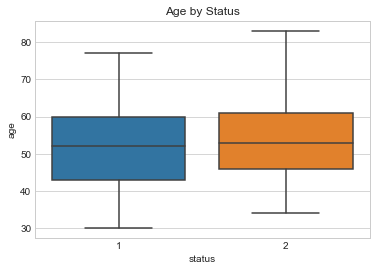

In [16]:
sns.boxplot(x='status',y='age',data=hb)
plt.title("Age by Status")
plt.show()

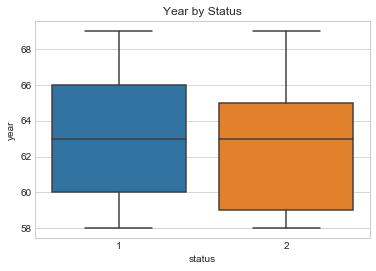

In [17]:
sns.boxplot(x='status',y='year',data=hb)
plt.title("Year by Status")
plt.show()

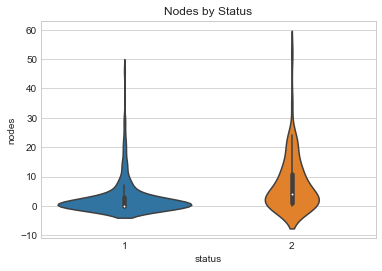

In [18]:
sns.violinplot(x='status',y='nodes',data=hb)
plt.title("Nodes by Status")
plt.show()

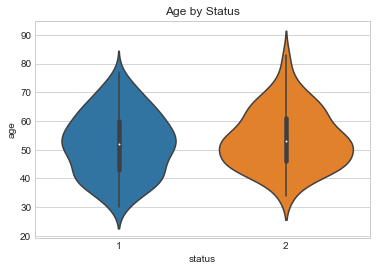

In [19]:
sns.violinplot(x='status',y='age',data=hb)
plt.title("Age by Status")
plt.show()

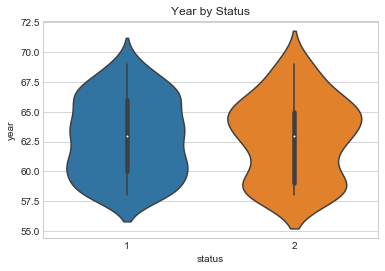

In [20]:
sns.violinplot(x='status',y='year',data=hb)
plt.title("Year by Status")
plt.show()


#### Observations:
- Amongst all the features,nodes feature is the most important.

- More the no of nodes(>45),the chance of survival is less.Similarly,more the age(>75) chance of survival is less.
- The amount of outliers is less for nodes feature.The age and year feature does not have outliers.
- The patients dying have positive nodes greater than 3 and 75% of patients have positive nodes below 12 
- Very less no of patients who died have positive nodes above 25



<h6>Q)Mean,Variance and Std dev </h6>

In [21]:
print("Means:")

nodes_status_1=hb[hb['status']==1]['nodes']
nodes_status_2=hb[hb['status']==2]['nodes']
print("Status 2 Nodes without outlier",np.mean(nodes_status_2[nodes_status_2<30]))
#Mean without outlier
print("Status 1 Nodes",np.mean(nodes_status_1))
print("Status 2 Nodes",np.mean(nodes_status_2))


print("\nStd-dev:")


print("Status 1 Nodes",np.std(hb[hb['status']==1]['nodes']))
print("Status 2 Nodes",np.std(hb[hb['status']==2]['nodes']))



Means:
Status 2 Nodes without outlier 6.544303797468355
Status 1 Nodes 2.7911111111111113
Status 2 Nodes 7.45679012345679

Std-dev:
Status 1 Nodes 5.857258449412131
Status 2 Nodes 9.128776076761632




<h6>Q)Median, Percentile, Quantile, IQR, MAD</h6>

In [22]:
print("Medians:")
print("Status 1 Nodes",np.median(nodes_status_1))
print("Status 2 Nodes",np.median(nodes_status_2))
print("Status 2 Nodes without outlier",np.median(nodes_status_2[nodes_status_2<30]))

print("\nPercentiles")
print("Status 1 Nodes",np.percentile(nodes_status_1,np.arange(0,100,25)))
print("Status 2 Nodes",np.percentile(nodes_status_2,np.arange(0,100,25)))

print("\n90th percentile")
print("Status 1 Nodes",np.percentile(nodes_status_1,90))
print("Status 2 Nodes",np.percentile(nodes_status_2,90))

from statsmodels import robust
print("\nMedian Absolute Deviation")
print("Status 1 Nodes",robust.mad(nodes_status_1))
print("Status 2 Nodes",robust.mad(nodes_status_2))

Medians:
Status 1 Nodes 0.0
Status 2 Nodes 4.0
Status 2 Nodes without outlier 4.0

Percentiles
Status 1 Nodes [0. 0. 0. 3.]
Status 2 Nodes [ 0.  1.  4. 11.]

90th percentile
Status 1 Nodes 8.0
Status 2 Nodes 20.0

Median Absolute Deviation
Status 1 Nodes 0.0
Status 2 Nodes 5.930408874022408


### 1.4 Bivariate analysis - 2D Scatter plots and Pair plots



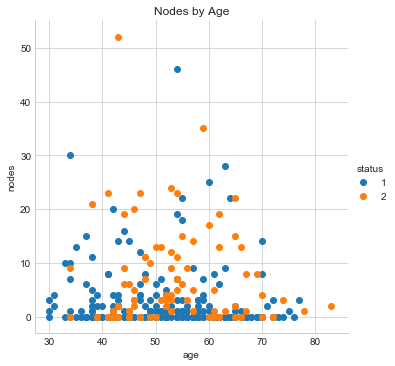

In [24]:
sns.set_style("whitegrid")
sns.FacetGrid(hb,hue="status",size=5)\
    .map(plt.scatter,"age","nodes")\
    .add_legend()
plt.title("Nodes by Age")
plt.show()

#### Observations :

- All the patients survived with nodes in range [0,5] and age less than 33
- Above 76 age,even with lesser no of nodes the patients died

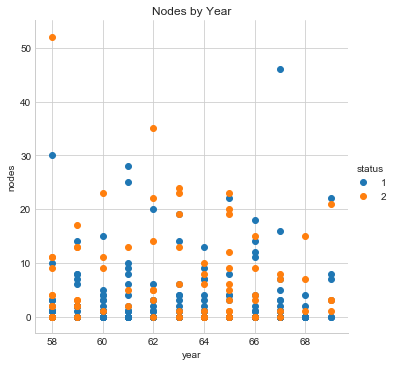

In [28]:
sns.set_style("whitegrid")
sns.FacetGrid(hb,hue="status",size=5)\
    .map(plt.scatter,"year","nodes")\
    .add_legend()
plt.title("Nodes by Year")
plt.show()

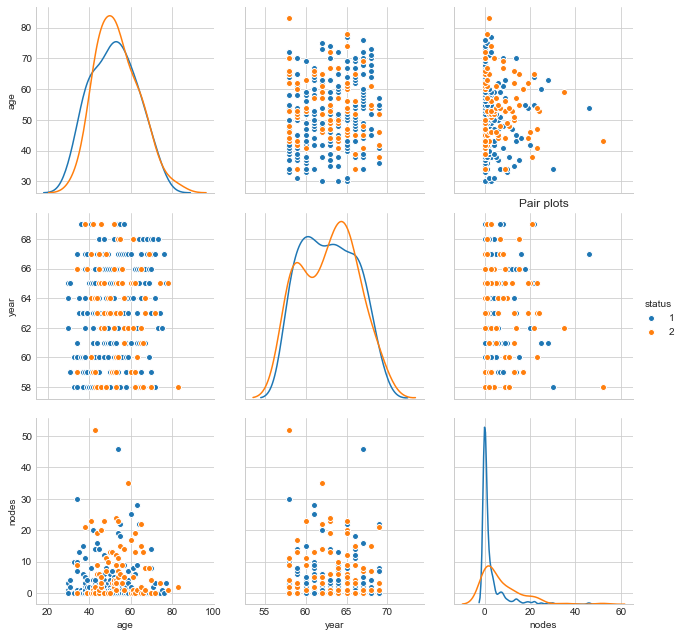

In [18]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data=hb,x_vars=["age","year","nodes"],y_vars=["age","year","nodes"],
             hue="status",size=3,diag_kind="kde")
plt.title("Pair plots")
plt.show()

#### Observations:
- None of the plots clearly separate patients died and survived distinctly.


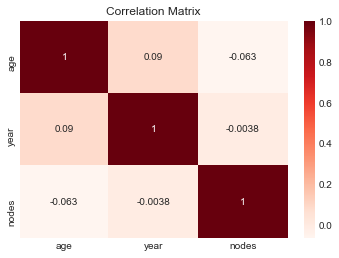

In [29]:
sns.heatmap(hb[['age','year','nodes']].corr(),annot=True,cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

#### Observations:

- There is less correlation between the features.

### 1.5 Final conclusions of the Exploration


- This dataset is an imbalanced dataset with 74% values belonging to status=1 and 26% values belonging to status=2.



From Histograms,PDF's and CDF's :
- The distribution of age and year features is quite overlapping while nodes feature shows a slight separation between the distributions for survived and patients died.
- All the patients below 36 have survived and above 76 have died and all the patients who were before the year 58 have died
- As the years are increasing,the probabilities of patients surviving is reducing and the probabilities of patients dying is increasing.
- The patients who have survived  have a range of positive axiliary nodes between 0 and 3 & the patients died most probably have positive nodes greater than 3.More the no of positive nodes,more the probability of dying.90% of patients who died have positive nodes below 20.80% of patients who have survived have positive nodes between the range [0,3]
- As the age is increasing, the probability of dying is increasing.


From scatterplots,pairplots:

- All the patients survived with nodes in range [0,5] and age less than 33
- Amongst all the features,**nodes** feature is the most important.
- There is no correlation between features
- More the no of nodes(>45),the chance of survival is less.Similarly,more the age(>75) chance of survival is less.
- None of the plots clearly separate patients died and survived distinctly.
